In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
path = "C:/dev/circle_detection/image.jdfld"

r_edge = path.rfind(".")
print(r_edge)
if r_edge > -1:
    path = path[:r_edge]
print(path)
l_edge = path.rfind("/" or "\\")
if l_edge > -1:
    path = path[l_edge+1:]
print(path)

29
C:/dev/circle_detection/image
image


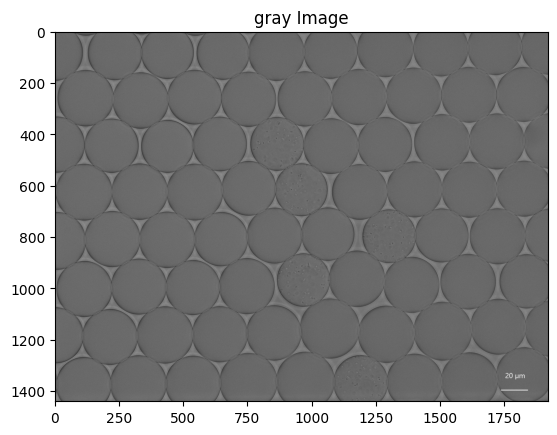

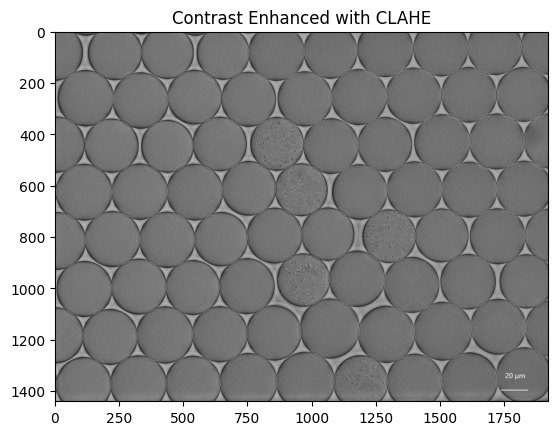

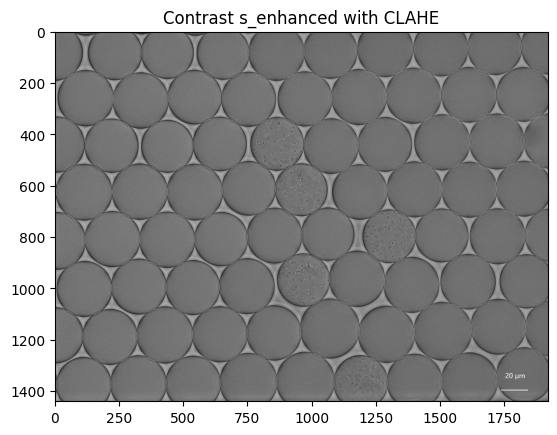

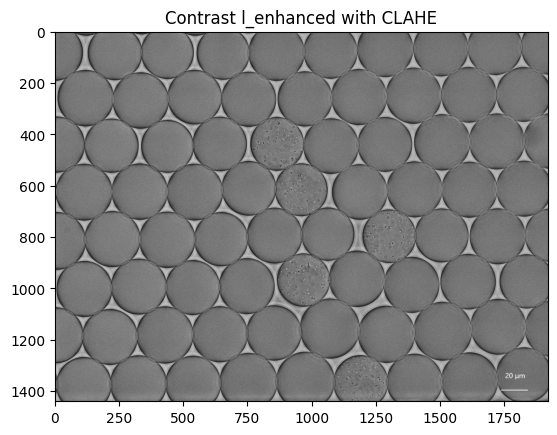

In [81]:
# original_image = cv2.imread("img.tif")
original_image = cv2.imread("20240814_EcoN_40x_7BF_28.tif")
dark_reference = cv2.imread("dark_ref.tif")

gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")
plt.title("gray Image")
plt.show()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)

# Show the enhanced image
plt.imshow(enhanced, cmap="gray")
plt.title("Contrast Enhanced with CLAHE")
plt.show()

clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(4, 4))
s_enhanced = clahe.apply(gray)

# Show the enhanced image
plt.imshow(s_enhanced, cmap="gray")
plt.title("Contrast s_enhanced with CLAHE")
plt.show()

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(16, 16))
l_enhanced = clahe.apply(gray)

# Show the enhanced image
plt.imshow(l_enhanced, cmap="gray")
plt.title("Contrast l_enhanced with CLAHE")
plt.show()



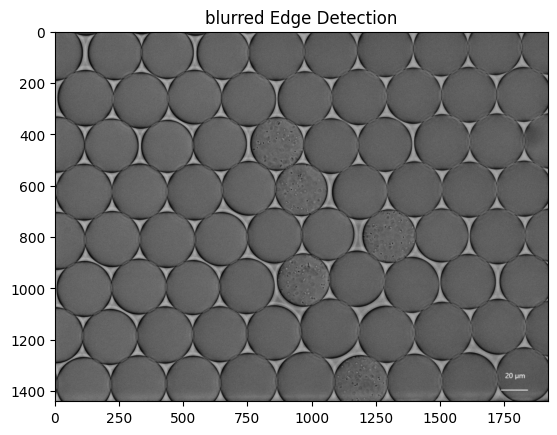

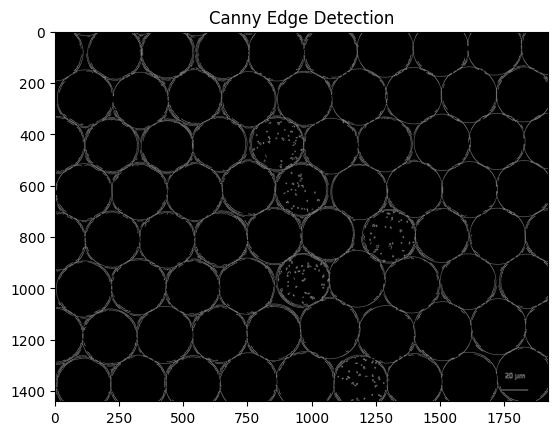

In [88]:
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(enhanced, (5, 5), 0)
plt.imshow(blurred, cmap="gray")
plt.title("blurred Edge Detection")
plt.show()

# Apply Canny edge detection
# edges = cv2.Canny(blurred, 10, 50)

edges = cv2.Canny(blurred, 50, 100)

# Show the edges
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.show()


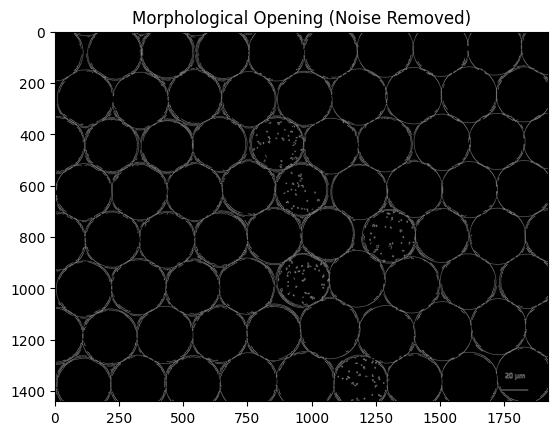

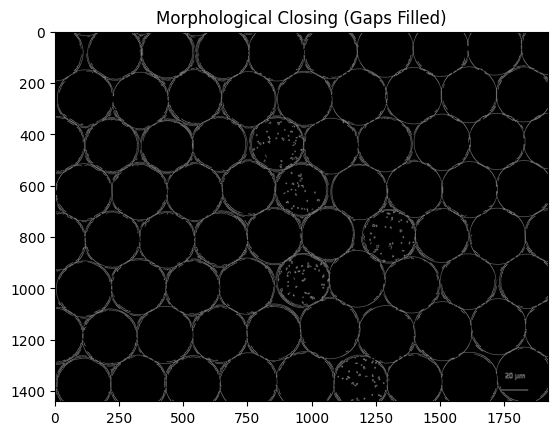

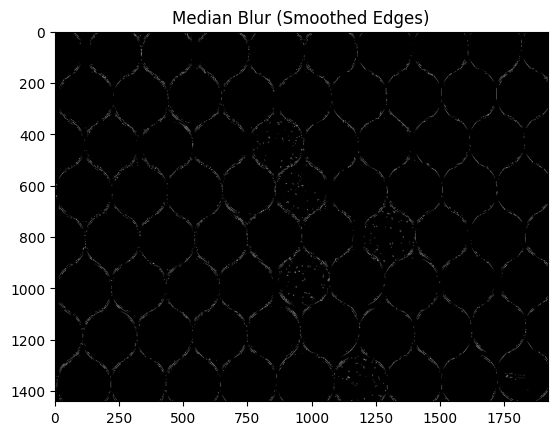

True

In [89]:
# Define a small kernel for noise removal
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))

# Apply morphological opening
opened1 = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)

# Show the result
plt.imshow(opened1, cmap="gray")
plt.title("Morphological Opening (Noise Removed)")
plt.show()
cv2.imwrite("morphological_opening.png", opened1)

# Apply morphological closing to fill gaps
closed = cv2.morphologyEx(opened1, cv2.MORPH_CLOSE, kernel)

# Show the result
plt.imshow(closed, cmap="gray")
plt.title("Morphological Closing (Gaps Filled)")
plt.show()
cv2.imwrite("morphological_closing.png", closed)

# Apply median blur to smooth edges
smoothed = cv2.medianBlur(closed, 3)

# Show the result
plt.imshow(smoothed, cmap="gray")
plt.title("Median Blur (Smoothed Edges)")
plt.show()
cv2.imwrite("median_blur.png", smoothed)

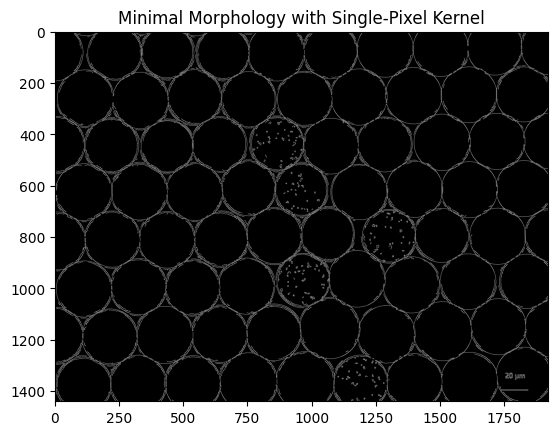

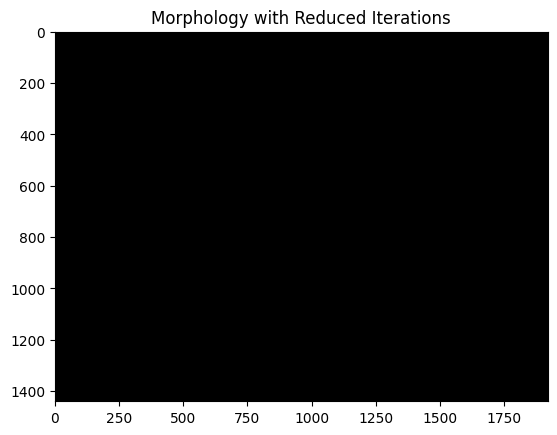

In [90]:
kernel = np.array([[1]], dtype=np.uint8)  # Single-pixel kernel

# Apply minimal erosion and dilation
opened2 = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)
plt.imshow(opened2, cmap="gray")
plt.title("Minimal Morphology with Single-Pixel Kernel")
plt.show()

cv2.imwrite("processed_edges.png", opened2)

# Define a small kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Reduce the number of iterations
opened2 = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel, iterations=1)
plt.imshow(opened2, cmap="gray")
plt.title("Morphology with Reduced Iterations")
plt.show()

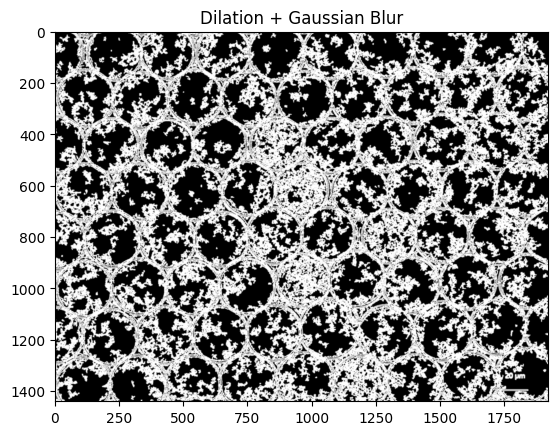

True

In [85]:
# Define a small kernel for dilation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Apply dilation
dilated = cv2.dilate(closed, kernel, iterations=1)

# Apply Gaussian blur to the dilated image
final_edges = cv2.GaussianBlur(dilated, (5, 5), 0)

# Show the result
plt.imshow(final_edges, cmap="gray")
plt.title("Dilation + Gaussian Blur")
plt.show()
cv2.imwrite("dilation_gaussian_blur.png", final_edges)

Detected 1230 circles


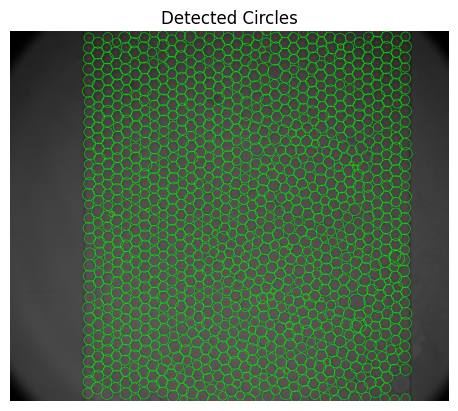

In [80]:
# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    final_edges,           # The processed edges image
    cv2.HOUGH_GRADIENT,    # The detection method (always use HOUGH_GRADIENT)
    dp=1,                  # Inverse accumulator resolution
    minDist=20,            # Minimum distance between circle centers
    param1=50,             # Higher Canny edge threshold
    param2=30,             # Accumulator threshold for circle detection
    minRadius=10,           # Minimum circle radius
    maxRadius=50           # Maximum circle radius
)

# Check if any circles were detected
if circles is not None:
    circles = np.uint16(np.around(circles))  # Round the values
    print(f"Detected {len(circles[0])} circles")
    
    # Draw the detected circles on the original image
    output = original_image.copy()
    for (x, y, r) in circles[0, :]:
        cv2.circle(output, (x, y), r, (0, 255, 0), 2)  # Draw the circle
        cv2.circle(output, (x, y), 2, (0, 0, 255), 3)  # Draw the center

    # Display the result
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title("Detected Circles")
    plt.axis("off")
    plt.show()
    cv2.imwrite("zoutput.png", output)
else:
    print("No circles detected.")

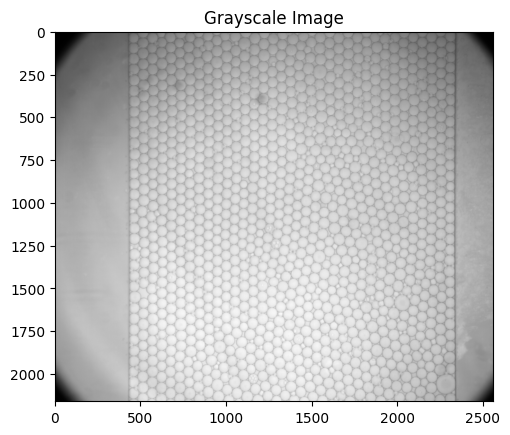

In [18]:
img = cv2.imread("img.tif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Show the grayscale image
plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")
plt.show()

In [3]:
# # Apply Gaussian Blur
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# plt.imshow(blurred, cmap="gray")
# plt.title("Blurred Image")
# plt.show()

# # Perform Edge Detection
# edges = cv2.Canny(blurred, 50, 150)
# plt.imshow(edges, cmap="gray")
# plt.title("Edge Detection")
# plt.show()



Detected circles: 187


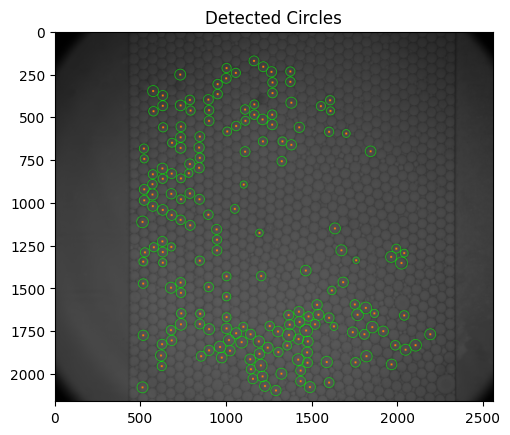

29.06951871657754
19


In [12]:
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=15,
                           param1=50, param2=20, minRadius=5, maxRadius=50)

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    print(f"Detected circles: {len(circles)}")
    radii = []
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 2) # Draw circle
        cv2.rectangle(img, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)  # Draw center
        radii.append(r)

    # Display results with circles
    # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title("Detected Circles")
    plt.show()
    if radii:
        print(sum(radii) / len(radii))
        print(min(radii))
        
else:
    print("No circles detected")

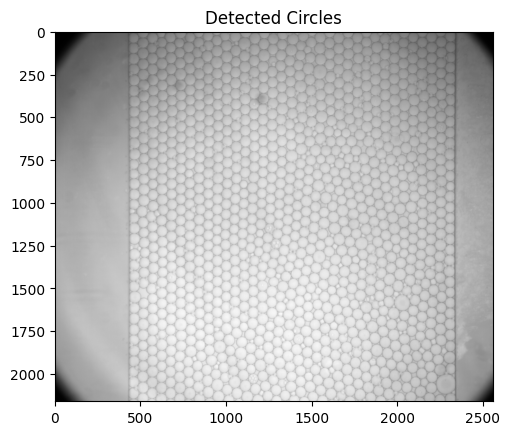

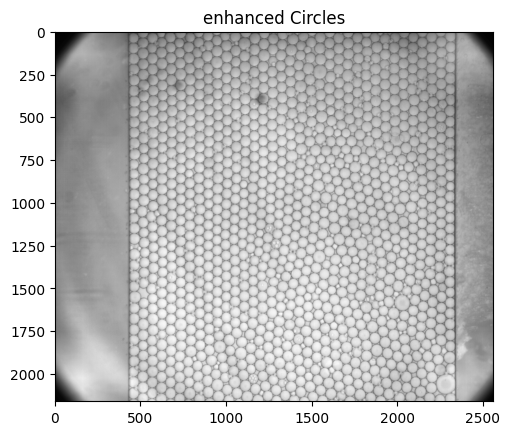

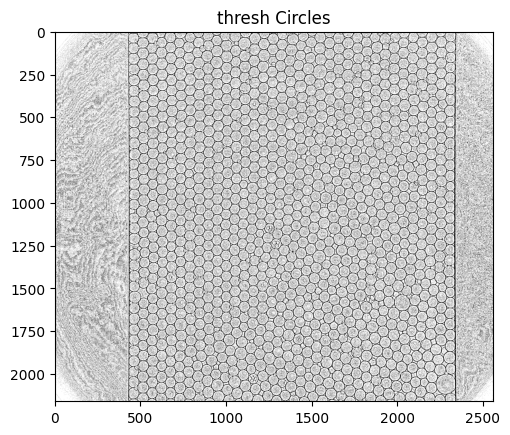

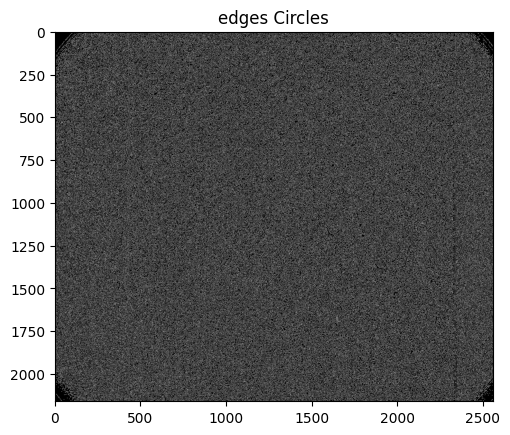

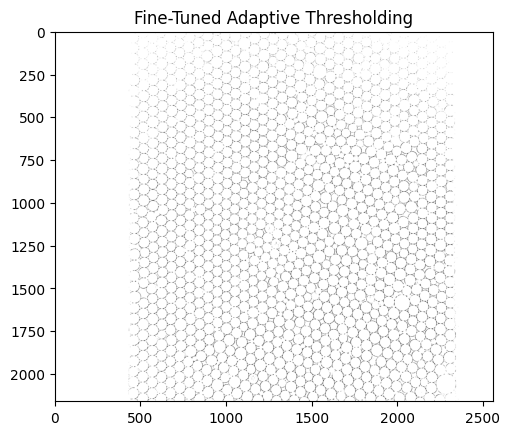

In [30]:
img = cv2.imread("img.tif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")
plt.title("Detected Circles")
plt.show()
# Enhance contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)
plt.imshow(enhanced, cmap="gray")
plt.title("enhanced Circles")
plt.show()

# Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 2)
plt.imshow(thresh, cmap="gray")
plt.title("thresh Circles")
plt.show()
# Run Canny edge detection
edges = cv2.Canny(thresh, 30, 100)
plt.imshow(edges, cmap="gray")
plt.title("edges Circles")
plt.show()

thresh = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 15, 10)  # Adjust blockSize and C
plt.imshow(thresh, cmap="gray")
plt.title("Fine-Tuned Adaptive Thresholding")
plt.show()

Detected circles: 39


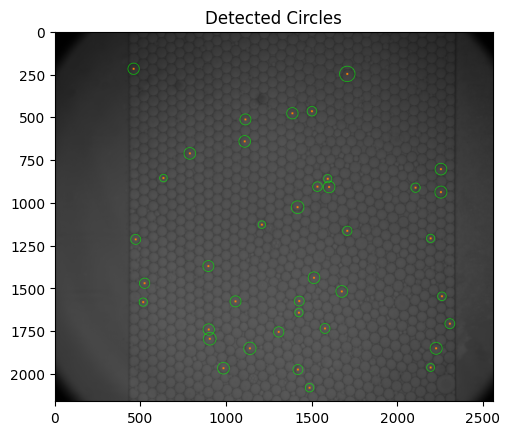

30.41025641025641
22


In [26]:
img = cv2.imread("img.tif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, dp=0.8, minDist=30,
                           param1=50, param2=50, minRadius=10, maxRadius=50)

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    print(f"Detected circles: {len(circles)}")
    radii = []
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 2) # Draw circle
        cv2.rectangle(img, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)  # Draw center
        radii.append(r)

    # Display results with circles
    # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title("Detected Circles")
    plt.show()
    if radii:
        print(sum(radii) / len(radii))
        print(min(radii))
        
else:
    print("No circles detected")